<a href="https://colab.research.google.com/github/peterpanw/Machine_learning/blob/main/softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#加载数据集
(train_image, train_label),(test_image, test_label)=tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_image.shape

(60000, 28, 28)

In [ ]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

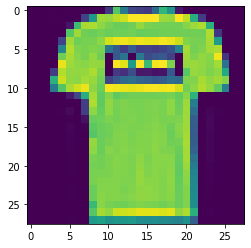

In [ ]:
plt.imshow(train_image[1])

In [ ]:
#数据归一化处理
train_image=train_image/255
test_image=test_image/255

In [ ]:
#构建网络
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#设置优化器和损失函数
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']    
)

In [ ]:
#开始训练
history=model.fit(train_image,train_label,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5144 - acc: 0.8201
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3843 - acc: 0.8621
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3500 - acc: 0.8741
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3244 - acc: 0.8814
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3078 - acc: 0.8859
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2950 - acc: 0.8915
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2827 - acc: 0.8958
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2717 - acc: 0.8999
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2643 - acc: 0.9027
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2569 - acc: 0.9053
Epoch 11/20
1875/1875 [======

Text(0, 0.5, 'acc')

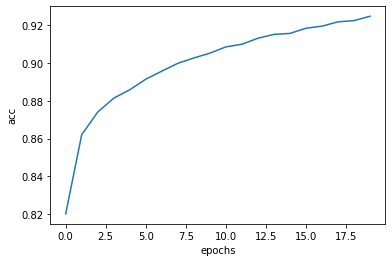

In [ ]:
# 画图，做出epochs与acc的关系曲线
plt.plot(history.epoch,history.history.get('acc'))
plt.xlabel('epochs')
plt.ylabel('acc')

In [ ]:
#用测试集对训练好的模型进行测试
model.evaluate(test_image,test_label)

313/313 [==============================] - 0s 1ms/step - loss: 0.3701 - acc: 0.8781


[0.37005844712257385, 0.8780999779701233]

In [ ]:
#改进网络I，增加网络广度，即神经元个数，从64个增加到128个
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']    
)
history=model.fit(train_image,train_label,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4979 - acc: 0.8256
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3756 - acc: 0.8648
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3389 - acc: 0.8763
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3133 - acc: 0.8850
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951 - acc: 0.8911
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2831 - acc: 0.8951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2687 - acc: 0.9001
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2575 - acc: 0.9044
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2472 - acc: 0.9069
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2386 - acc: 0.9112
Epoch 11/20
1875/1875 [======

In [ ]:
model.evaluate(test_image,test_label)

313/313 [==============================] - 1s 1ms/step - loss: 0.3570 - acc: 0.8891


[0.3569765090942383, 0.8891000151634216]

Text(0, 0.5, 'acc')

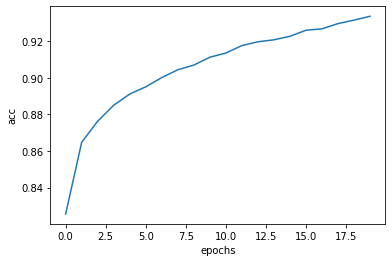

In [ ]:
plt.plot(history.epoch,history.history.get('acc'))
plt.xlabel('epochs')
plt.ylabel('acc')

In [ ]:
#改进网络II，增加网络深度，在第一个model的基础上增加一个隐藏层，epochs还是20
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']    
)
history=model.fit(train_image,train_label,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5091 - acc: 0.8192
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3773 - acc: 0.8622
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3420 - acc: 0.8740
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3222 - acc: 0.8809
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3031 - acc: 0.8881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2891 - acc: 0.8928
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2780 - acc: 0.8961
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2687 - acc: 0.9004
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2587 - acc: 0.9029
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2507 - acc: 0.9054
Epoch 11/20
1875/1875 [======

In [ ]:
model.evaluate(test_image,test_label)

313/313 [==============================] - 1s 1ms/step - loss: 0.3827 - acc: 0.8772


[0.38273507356643677, 0.8772000074386597]

Text(0, 0.5, 'acc')

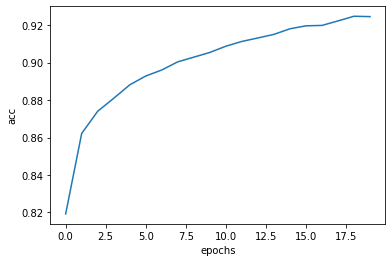

In [ ]:
plt.plot(history.epoch,history.history.get('acc'))
plt.xlabel('epochs')
plt.ylabel('acc')

In [ ]:
#改进网络III：同时增加隐藏层和每层的神经元
model = tf.keras.Sequential()
#添加Flatten层将（28，28）的数据变成[28*28]
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['acc']
)
history=model.fit(train_image,train_label,epochs=20)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_32 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_34 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_35 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_36 (Dense)             (None, 128)              

In [ ]:
model.evaluate(test_image,test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.3605 - acc: 0.8850


[0.36048224568367004, 0.8849999904632568]

Text(0, 0.5, 'acc')

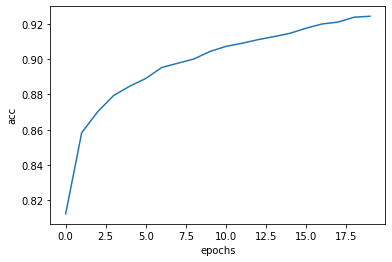

In [ ]:
plt.plot(history.epoch,history.history.get('acc'))
plt.xlabel('epochs')
plt.ylabel('acc')

In [ ]:
test_label

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [6]:
train_image=train_image/255

In [7]:
test_image=test_image/255

In [ ]:
#以上效果都不明显
#应用卷积网络
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
#分类器
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_45 (Dense)             (None, 10)              

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [ ]:
history=model.fit(train_image.reshape(-1,28,28,1),train_label,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 84s 45ms/step - loss: 0.4379 - acc: 0.8405
Epoch 2/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.2939 - acc: 0.8932
Epoch 3/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2495 - acc: 0.9075
Epoch 4/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2196 - acc: 0.9193
Epoch 5/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.1918 - acc: 0.9279


Text(0, 0.5, 'acc')

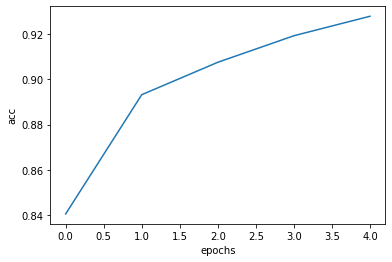

In [ ]:
plt.plot(history.epoch,history.history.get('acc'))
plt.xlabel('epochs')
plt.ylabel('acc')

In [ ]:
model.evaluate(test_image.reshape(-1,28,28,1),test_label)

313/313 [==============================] - 4s 12ms/step - loss: 0.2775 - acc: 0.8979


[0.27753493189811707, 0.8978999853134155]

In [ ]:
import numpy as np
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_image.reshape(-1,28,28,1))

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_label[0]

9

In [ ]:
#应用卷积网络
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
#分类器
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [ ]:
history=model.fit(train_image.reshape(-1,28,28,1),train_label,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.4369 - acc: 0.8425
Epoch 2/20
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2944 - acc: 0.8931
Epoch 3/20
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2482 - acc: 0.9083
Epoch 4/20
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2143 - acc: 0.9196
Epoch 5/20
1875/1875 [==============================] - 78s 42ms/step - loss: 0.1861 - acc: 0.9297
Epoch 6/20
1875/1875 [==============================] - 78s 41ms/step - loss: 0.1656 - acc: 0.9371
Epoch 7/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.1420 - acc: 0.9460
Epoch 8/20
1875/1875 [==============================] - 78s 41ms/step - loss: 0.1255 - acc: 0.9517
Epoch 9/20
1875/1875 [==============================] - 78s 42ms/step - loss: 0.1085 - acc: 0.9589
Epoch 10/20
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0962 - acc: 0.9639
Epoch 11/

Text(0, 0.5, 'acc')

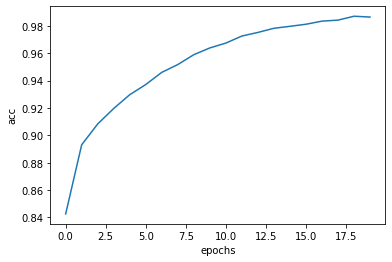

In [ ]:
plt.plot(history.epoch,history.history.get('acc'))
plt.xlabel('epochs')
plt.ylabel('acc')

In [ ]:
model.evaluate(test_image.reshape(-1,28,28,1),test_label)

313/313 [==============================] - 4s 11ms/step - loss: 0.4848 - acc: 0.9106


[0.48476797342300415, 0.9106000065803528]

In [9]:
#构建网络
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
#设置优化器和损失函数
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']    
)

In [13]:
history=model.fit(train_image,train_label,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1347 - acc: 0.9495
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1350 - acc: 0.9495
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1327 - acc: 0.9503
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1319 - acc: 0.9504
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1313 - acc: 0.9505
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1311 - acc: 0.9512
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1262 - acc: 0.9524
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1258 - acc: 0.9524
Epoch 9/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1233 - acc: 0.9536
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1245 - acc: 0.9532
Epoch 11/100
1875/1

Text(0, 0.5, 'acc')

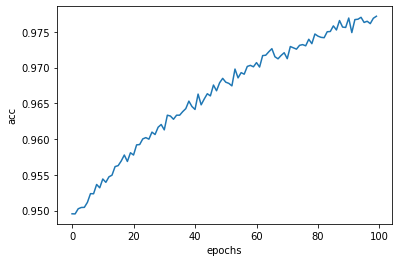

In [14]:
plt.plot(history.epoch,history.history.get('acc'))
plt.xlabel('epochs')
plt.ylabel('acc')

In [15]:
# 以上几个实验可以看出，卷积网络训练20次的结果比简单全连接网络100次的效果都要好